In [1]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import os
import scipy
import numpy as np
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [2]:
%run "trimmer.ipynb"
%run "training.ipynb"

# DATA PREPROCESSING AND FILTERING

In [3]:
folder_path = '../../non_condition/non_condition_data/instruction_data_clean/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.mat')]

file_list.sort()

print(file_list)

['../../non_condition/non_condition_data/instruction_data_clean/P_1.mat', '../../non_condition/non_condition_data/instruction_data_clean/P_10.mat', '../../non_condition/non_condition_data/instruction_data_clean/P_2.mat', '../../non_condition/non_condition_data/instruction_data_clean/P_3.mat', '../../non_condition/non_condition_data/instruction_data_clean/P_4.mat', '../../non_condition/non_condition_data/instruction_data_clean/P_5.mat', '../../non_condition/non_condition_data/instruction_data_clean/P_9.mat', '../../non_condition/non_condition_data/instruction_data_clean/S_1.mat', '../../non_condition/non_condition_data/instruction_data_clean/S_10.mat', '../../non_condition/non_condition_data/instruction_data_clean/S_2.mat', '../../non_condition/non_condition_data/instruction_data_clean/S_3.mat', '../../non_condition/non_condition_data/instruction_data_clean/S_4.mat', '../../non_condition/non_condition_data/instruction_data_clean/S_5.mat', '../../non_condition/non_condition_data/instruct

In [4]:
# X, Y = trim_discontinuous_files(file_list, discontinuous_files, total_found)
X = []
Y = []

for file in file_list:
    x = scipy.io.loadmat(file)
    x = x['data']
    
    # removethe last 250 elements from each trial
    x = x[:,:,:500]

    first_letter = file.split('/')[-1][0]

    # create output vector. If file begins with 'P', then y = [1,0], else y = [0,1], having the same dimension as x
    if first_letter == 'P':
        y = np.zeros((x.shape[0],2))
        y[:,0] = 1
    else:
        y = np.zeros((x.shape[0],2))
        y[:,1] = 1

    X.append(x)
    Y.append(y)


In [5]:
def plot_signals(eeg_array):
    num_samples = eeg_array.shape[0]
    num_channels = eeg_array.shape[1]

    for sample in range(num_samples):
        plt.figure()
        plt.title(f"Sample {sample}")
        for channel in range(num_channels):
            plt.plot(eeg_array[sample, channel, :], label=f"Channel {channel}")
        # plt.legend()
        plt.show()

In [6]:
kick_out = [(3, [23]), (4, [34, 43]), (7, [5, 32]), (12, [22])]

file_dict = {0: 'P_1', 1: 'P_10', 2: 'P_2', 3: 'P_3', 4: 'P_4', 5: 'P_5', 6: 'P_9', 7: 'S_1', 8: 'S_10', 
             9: 'S_2', 10: 'S_3', 11: 'S_4', 12: 'S_5', 13: 'S_9'}

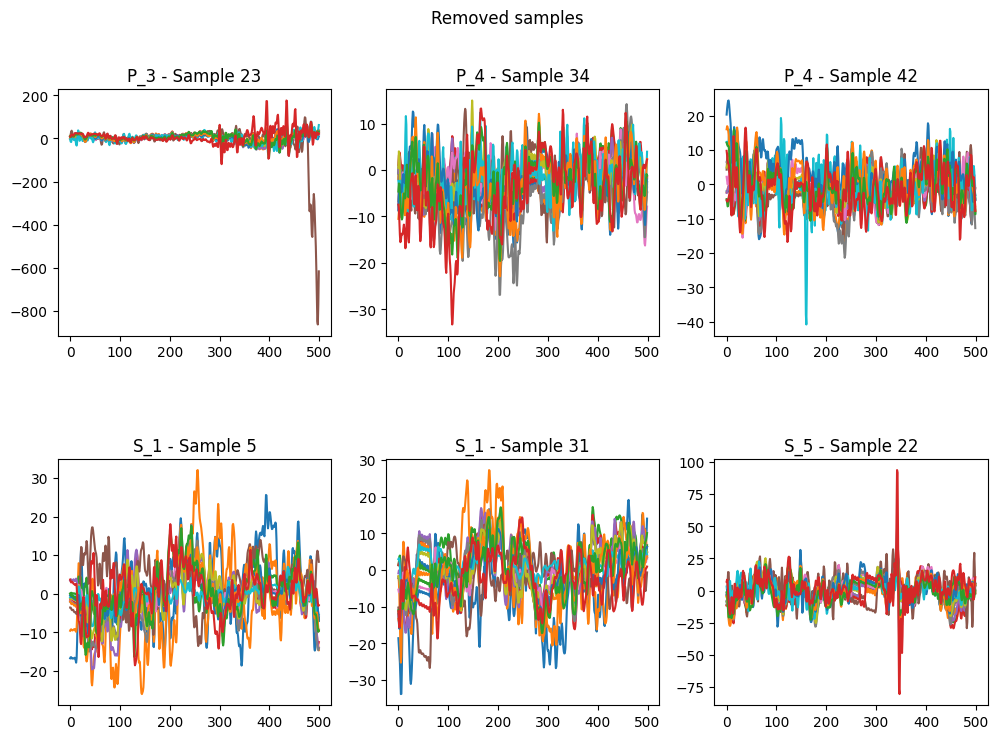

In [7]:
new_X, new_Y = trim_manually(kick_out, X, Y, file_dict)  

In [9]:
desired_channels = [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12]
for i in range(len(new_X)):
    new_X[i] = new_X[i][:, desired_channels, :]

In [10]:
print_eliminations(file_list, new_X, new_Y)

(47, 14, 750) -> (47, 4, 500) (47, 2)
(34, 14, 750) -> (34, 4, 500) (34, 2)
(39, 14, 750) -> (39, 4, 500) (39, 2)
(52, 14, 750) -> (51, 4, 500) (51, 2)
(53, 14, 750) -> (51, 4, 500) (51, 2)
(55, 14, 750) -> (55, 4, 500) (55, 2)
(50, 14, 750) -> (50, 4, 500) (50, 2)
(35, 14, 750) -> (33, 4, 500) (33, 2)
(54, 14, 750) -> (54, 4, 500) (54, 2)
(41, 14, 750) -> (41, 4, 500) (41, 2)
(57, 14, 750) -> (57, 4, 500) (57, 2)
(58, 14, 750) -> (58, 4, 500) (58, 2)
(49, 14, 750) -> (48, 4, 500) (48, 2)
(66, 14, 750) -> (66, 4, 500) (66, 2)
Total samples removed:  6
Total samples remaining:  684


# TRAINING ON THE FILTERED DATA

In [12]:
scroll_style = """
<style>
.output {
    overflow-y: scroll;
    max-height: 300px; /* Adjust the height as per your preference */
}
</style>
"""

In [13]:
kernels, chans, samples = 1, 11, 500

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, new_X, new_Y, "../results/walk_instr_clean.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/walk_instr_clean.txt")